In [1]:
pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=96917c6cd182a5aaa5fa447ed564d4feac48c4c2111d1c0cce800ff2de2cd483
  Stored in directory: c:\users\yash\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [5]:
import opendatasets as od

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import joblib
import pprint
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from functools import partial

In [3]:
pip install BorutaShap

Note: you may need to restart the kernel to use updated packages.


[link text](https://medium.com/analytics-vidhya/is-this-the-best-feature-selection-algorithm-borutashap-8bc238aa1677) The complete explaination of BorutaShap is given in this article

## **To reduce memory usage so the system can operate smoothly**

In [4]:
# Derived from the original script https://www.kaggle.com/gemartin/load-data-reduce-memory-usage  # by Guillaume Martin  
def reduce_mem_usage(df, verbose=True):     
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']     
  start_mem = df.memory_usage().sum() / 1024**2         
  for col in df.columns:         
    col_type = df[col].dtypes         
    if col_type in numerics:             
      c_min = df[col].min()             
      c_max = df[col].max()             
      if str(col_type)[:3] == 'int':                 
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:                     
          df[col] = df[col].astype(np.int8)                 
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:                     
          df[col] = df[col].astype(np.int16)                 
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:                     
          df[col] = df[col].astype(np.int32)                 
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:                     
          df[col] = df[col].astype(np.int64)               
      else:                 
        if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:                     
          df[col] = df[col].astype(np.float32)                 
        else:                     
          df[col] = df[col].astype(np.float64)         
  end_mem = df.memory_usage().sum() / 1024**2     
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))    
  return df

## **Importing the dataset**

In [5]:
data_train = pd.read_csv(r'C:\Users\Yash\Downloads\tabular-playground-series-nov-2021\train.csv', index_col='id')

In [127]:
data_test = pd.read_csv(r'C:\Users\Yash\Downloads\tabular-playground-series-nov-2021\test.csv')

In [128]:
data_test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003229,4.838660,585.529,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,...,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
1,600001,0.008602,0.505536,-100.099,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,...,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
2,600002,1.461000,2.437260,-112.964,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,...,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
3,600003,0.140556,3.085610,179.451,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,...,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
4,600004,0.128876,5.199760,107.466,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,...,0.058860,2.660430,0.135425,0.036481,0.093912,0.056315,1.110710,3.584470,0.145319,-0.050393


In [115]:
data_test.shape

(540000, 100)

## **Exploratory Data Analysis(EDA)**

In [7]:
data_train.shape

(600000, 101)

In [8]:
data_train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
data_train.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'),

In [10]:
data_train.nunique().values

array([516483, 409963, 485459, 398271, 502075, 408826, 401451, 403969,
       403082, 489350, 411710, 395261, 487380, 403995, 390511, 399560,
       503836, 415890, 408418, 472472, 477361, 463788, 405890, 494695,
       500666, 410697, 412946, 468021, 461373, 405261, 497147, 503328,
       497622, 473584, 410986, 489939, 470902, 405523, 419247, 514374,
       404915, 402568, 482157, 413581, 462319, 403338, 473883, 400176,
       494814, 503783, 411925, 479453, 489656, 482749, 408755, 397458,
       509895, 399562, 473621, 475261, 500768, 489110, 494172, 511206,
       477696, 405386, 405047, 406066, 498937, 495146, 410788, 401973,
       487054, 465774, 400795, 499286, 488819, 413866, 482478, 494930,
       409160, 499979, 403288, 493627, 503958, 405213, 400567, 507303,
       510289, 462090, 486746, 409188, 489279, 459167, 481499, 482799,
       407424, 399620, 505994, 499969,      2], dtype=int64)

In [11]:
data_train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,0.134370,...,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048,0.506010
std,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,0.421892,...,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896,0.499964
min,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,-2.577840,...,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380,0.000000
25%,0.026222,1.186238,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,0.019563,...,1.214178,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105,0.000000
50%,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,0.058752,...,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471,1.000000
75%,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996912,3.823450,3.804360,0.101046,...,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872,1.000000
max,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,7.078460,...,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110,1.000000


In [13]:
sample_train = data_train.sample(n=200000, random_state=0)


In [14]:
X_train = sample_train.drop(columns='target')
y_train = sample_train.target

## **Using BorutaShap for Feature Selection and Creating Magik**

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from BorutaShap import BorutaShap
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold

FOLD 1/5



60 attributes confirmed important: ['f58', 'f5', 'f21', 'f33', 'f57', 'f34', 'f65', 'f51', 'f9', 'f67', 'f83', 'f24', 'f95', 'f4', 'f66', 'f2', 'f81', 'f10', 'f49', 'f26', 'f91', 'f47', 'f22', 'f30', 'f50', 'f1', 'f45', 'f42', 'f40', 'f80', 'f55', 'f27', 'f8', 'f28', 'f31', 'f48', 'f96', 'f97', 'f11', 'f64', 'f60', 'f94', 'f32', 'f16', 'f53', 'f98', 'f44', 'f82', 'f43', 'f70', 'f15', 'f20', 'f41', 'f93', 'f17', 'f54', 'f71', 'f84', 'f25', 'f3']
33 attributes confirmed unimportant: ['f79', 'f29', 'f59', 'f89', 'f74', 'f87', 'f86', 'f69', 'f38', 'f88', 'f78', 'f12', 'f13', 'f68', 'f18', 'f62', 'f85', 'f61', 'f99', 'f19', 'f56', 'f76', 'f35', 'f6', 'f75', 'f52', 'f0', 'f63', 'f23', 'f46', 'f72', 'f92', 'f73']
7 tentative attributes remains: ['f37', 'f90', 'f7', 'f36', 'f39', 'f77', 'f14']


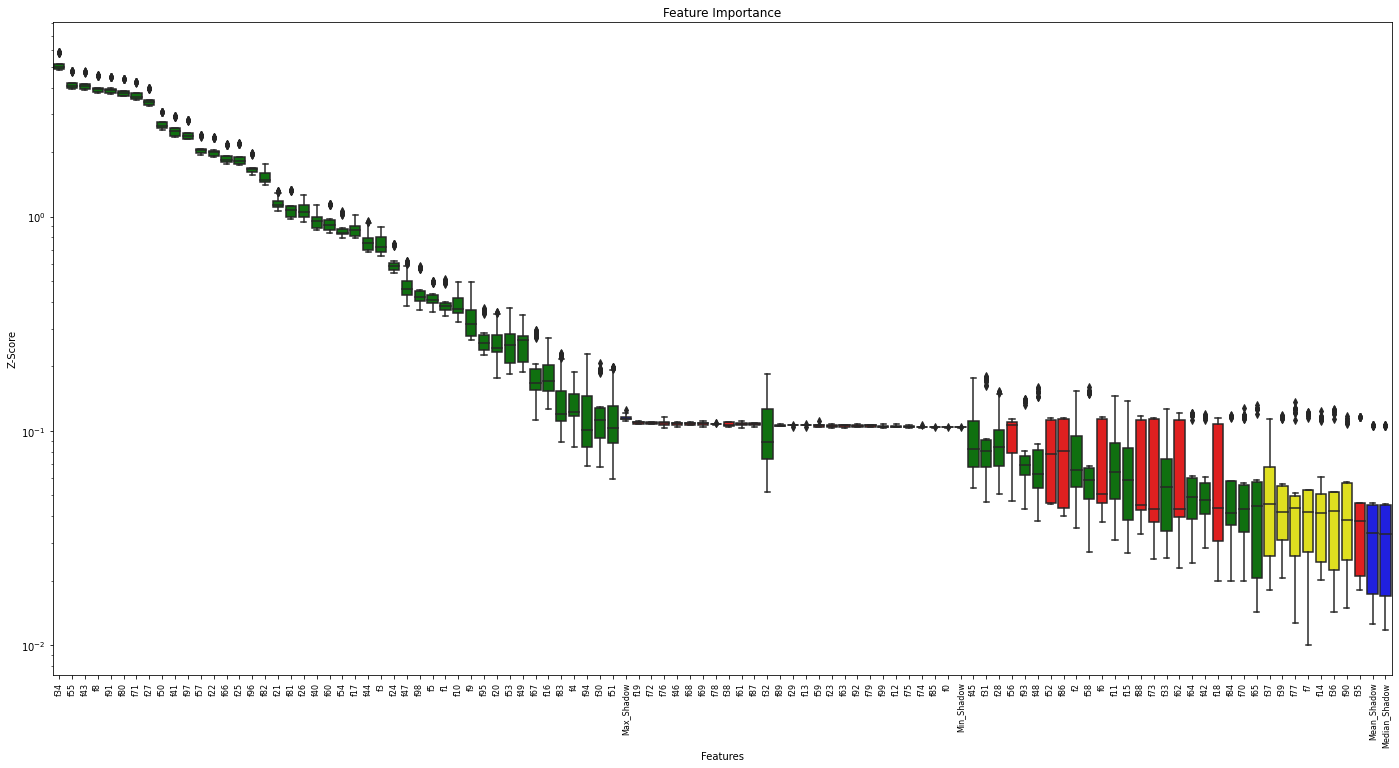

Selected features at fold 1 are: ['f1', 'f10', 'f11', 'f15', 'f16', 'f17', 'f2', 'f20', 'f21', 'f22', 'f24', 'f25', 'f26', 'f27', 'f28', 'f3', 'f30', 'f31', 'f32', 'f33', 'f34', 'f4', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f47', 'f48', 'f49', 'f5', 'f50', 'f51', 'f53', 'f54', 'f55', 'f57', 'f58', 'f60', 'f64', 'f65', 'f66', 'f67', 'f70', 'f71', 'f8', 'f80', 'f81', 'f82', 'f83', 'f84', 'f9', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98']
FOLD 2/5



56 attributes confirmed important: ['f5', 'f21', 'f57', 'f34', 'f51', 'f9', 'f67', 'f83', 'f24', 'f95', 'f4', 'f66', 'f2', 'f81', 'f10', 'f49', 'f26', 'f91', 'f47', 'f22', 'f30', 'f50', 'f1', 'f45', 'f40', 'f80', 'f55', 'f27', 'f8', 'f28', 'f31', 'f48', 'f11', 'f96', 'f97', 'f90', 'f60', 'f76', 'f94', 'f32', 'f16', 'f53', 'f98', 'f44', 'f82', 'f43', 'f15', 'f20', 'f41', 'f93', 'f36', 'f17', 'f54', 'f71', 'f25', 'f3']
38 attributes confirmed unimportant: ['f79', 'f29', 'f37', 'f33', 'f59', 'f89', 'f65', 'f74', 'f39', 'f86', 'f69', 'f38', 'f88', 'f78', 'f12', 'f13', 'f68', 'f18', 'f62', 'f85', 'f42', 'f61', 'f99', 'f64', 'f19', 'f56', 'f7', 'f35', 'f6', 'f52', 'f75', 'f0', 'f63', 'f70', 'f23', 'f72', 'f92', 'f73']
6 tentative attributes remains: ['f58', 'f46', 'f84', 'f87', 'f77', 'f14']


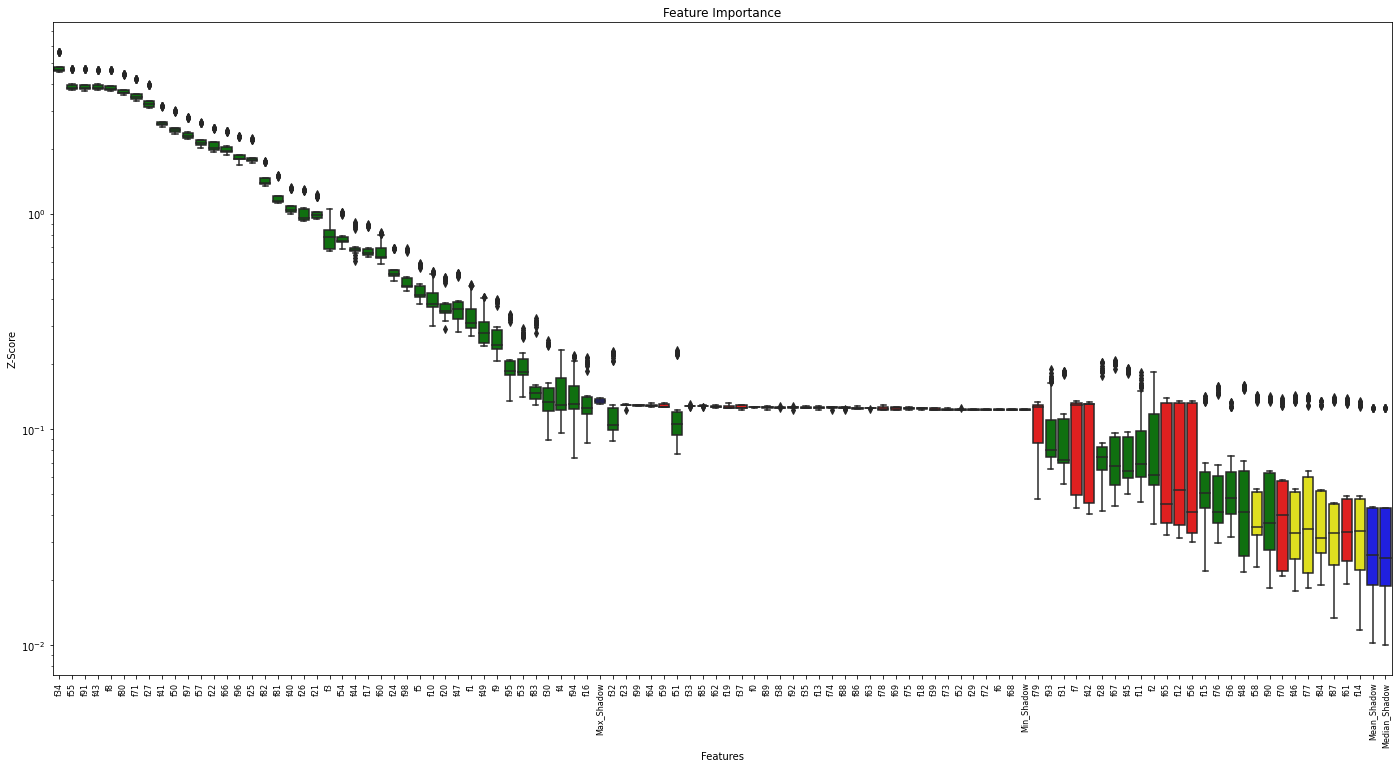

Selected features at fold 2 are: ['f1', 'f10', 'f11', 'f15', 'f16', 'f17', 'f2', 'f20', 'f21', 'f22', 'f24', 'f25', 'f26', 'f27', 'f28', 'f3', 'f30', 'f31', 'f32', 'f34', 'f36', 'f4', 'f40', 'f41', 'f43', 'f44', 'f45', 'f47', 'f48', 'f49', 'f5', 'f50', 'f51', 'f53', 'f54', 'f55', 'f57', 'f60', 'f66', 'f67', 'f71', 'f76', 'f8', 'f80', 'f81', 'f82', 'f83', 'f9', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98']
FOLD 3/5


In [ ]:
folds = 5 
kf = KFold(n_splits=folds, shuffle=True, random_state=0) 

selected_columns = list()     

for k, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):          
  print(f"FOLD {k+1}/{folds}")          
  
  model = XGBClassifier(         
      colsample_bytree= 0.50,          
      subsample= 0.50,          
      learning_rate= 0.012,          
      max_depth= 3,          
      min_child_weight= 252,         
      n_estimators= 1000,         
      random_state=0,         
      use_label_encoder=False,         
      objective='binary:logistic',         
      eval_metric='auc',
      tree_method='approx'      
      )          
  
  Feature_Selector = BorutaShap(model=model,                                   
                                importance_measure='shap',                                    
                                classification=True)      
  Feature_Selector.fit(X=X_train.iloc[train_idx, :], y=y_train.iloc[train_idx],                           
                       n_trials=50, random_state=0)          
  Feature_Selector.plot(which_features='all', figsize=(24,12))          
  selected_columns.append(sorted(Feature_Selector.Subset().columns))          
  print(f"Selected features at fold {k+1} are: {selected_columns[-1]}")

In [17]:
final_dataset = data_train[['f1', 'f10', 'f11', 'f14', 'f15', 'f16', 'f17', 'f2', 'f20', 'f21', 'f22', 'f24', 'f25', 'f26', 'f27', 'f28', 'f3', 'f30', 'f31', 'f32', 'f33', 'f34', 'f36', 'f37', 'f4', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f5', 'f50', 'f51', 'f53', 'f54', 'f55', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f64', 'f66', 'f67', 'f70', 'f71', 'f76', 'f77', 'f8', 'f80', 'f81', 'f82', 'f83', 'f87', 'f89', 'f9', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'target']]

In [18]:
final_dataset.head()

,f1,f10,f11,f14,f15,f16,f17,f2,f20,f21,...,f9,f90,f91,f93,f94,f95,f96,f97,f98,target
id,,,,,,,,,,,,,,,,,,,,,
0,3.59437,1.607190,-0.318058,1.35114,2.535930,0.197527,0.676494,132.8040,0.037380,0.230322,...,0.012330,0.010739,1.09862,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0
1,1.67336,0.331749,0.325091,4.33943,-0.224999,0.233586,3.381280,76.5336,-0.051268,0.006135,...,0.037706,0.135838,3.46017,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0
2,1.49747,0.328684,2.968810,5.30986,1.354790,-0.262018,1.379080,233.5460,-0.008806,0.109348,...,0.056995,0.117310,4.88300,0.032396,0.116092,-0.001689,-0.520069,2.14112,0.124464,0
3,0.24600,1.002680,4.869600,1.23843,2.348360,0.175475,1.608890,779.9670,0.005141,0.076506,...,0.123494,-0.015347,3.47439,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0
4,3.71542,0.711483,0.769988,3.71145,5.464350,0.287104,2.616950,156.1280,-0.010543,0.109121,...,0.034166,0.013781,1.91059,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,1


In [19]:
final_dataset.shape
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 71 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f1      600000 non-null  float64
 1   f10     600000 non-null  float64
 2   f11     600000 non-null  float64
 3   f14     600000 non-null  float64
 4   f15     600000 non-null  float64
 5   f16     600000 non-null  float64
 6   f17     600000 non-null  float64
 7   f2      600000 non-null  float64
 8   f20     600000 non-null  float64
 9   f21     600000 non-null  float64
 10  f22     600000 non-null  float64
 11  f24     600000 non-null  float64
 12  f25     600000 non-null  float64
 13  f26     600000 non-null  float64
 14  f27     600000 non-null  float64
 15  f28     600000 non-null  float64
 16  f3      600000 non-null  float64
 17  f30     600000 non-null  float64
 18  f31     600000 non-null  float64
 19  f32     600000 non-null  float64
 20  f33     600000 non-null  float64
 21  f34     60

## **Splitting the Dataset into Training and Test Set**

In [20]:
X = final_dataset.drop(columns='target')
print(X)

              f1       f10       f11       f14       f15       f16       f17  \
id                                                                             
0       3.594370  1.607190 -0.318058  1.351140  2.535930  0.197527  0.676494   
1       1.673360  0.331749  0.325091  4.339430 -0.224999  0.233586  3.381280   
2       1.497470  0.328684  2.968810  5.309860  1.354790 -0.262018  1.379080   
3       0.246000  1.002680  4.869600  1.238430  2.348360  0.175475  1.608890   
4       3.715420  0.711483  0.769988  3.711450  5.464350  0.287104  2.616950   
...          ...       ...       ...       ...       ...       ...       ...   
599995  1.640550  0.163757  1.880550  3.738570  5.559030  0.270988  4.683410   
599996  4.826860  0.955670  3.626730  2.634190  1.847890  0.253983  2.327860   
599997  0.502062  0.964948  1.856410  0.981413  0.764425  2.467300  1.779390   
599998  3.827470  1.097900  5.244340  1.787480  1.507910  0.145095  1.764690   
599999  3.457390  0.039689  3.123450  1.

In [21]:
y = final_dataset.target
print(y)

id
0         0
1         0
2         0
3         0
4         1
         ..
599995    1
599996    0
599997    0
599998    1
599999    1
Name: target, Length: 600000, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state = 11)


## Standard Scalling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sca_X_train = pd.DataFrame(sc_x.fit_transform(X_train))
sca_X_test = pd.DataFrame(sc_x.fit_transform(X_test))
sca_X_train.columns = X_train.columns.values 
sca_X_test.columns = X_test.columns.values
sca_X_train.index = X_train.index.values
sca_X_test = X_test.index.values
sca_X_train = X_train 
sca_X_test = X_test

##  Baseline Models
To choose the methods which will allow the model to achieve good performance

1) RandomForest = 64.81%

2) Logistic Regression = 72.97%

3) XGBoost = 70.31%

4) Decision Tree Classifier = 56.3%

5) Naive Bayes = 59.2%

## **1)Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=11, n_estimators=50, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=11)

## 1)Predicting the Validation set Result

In [44]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
acc = accuracy_score(y_test, y_pred)
classi = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65    222501
           1       0.66      0.64      0.65    227499

    accuracy                           0.65    450000
   macro avg       0.65      0.65      0.65    450000
weighted avg       0.65      0.65      0.65    450000



[[146092  76409]
 [ 81936 145563]]


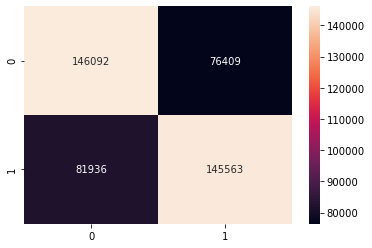

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

In [46]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6481222222222223


## **2) Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state=0, C=1000, solver='liblinear', penalty='l2', n_jobs=-1)
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=1000, n_jobs=-1, random_state=0, solver='liblinear')

## **2) Predicting the Validation set Result**

In [67]:
y_pred = classifier_LR.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
classi = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72    222501
           1       0.73      0.74      0.73    227499

    accuracy                           0.73    450000
   macro avg       0.73      0.73      0.73    450000
weighted avg       0.73      0.73      0.73    450000



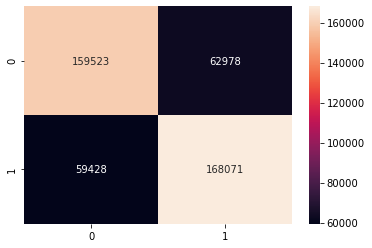

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [69]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.7279866666666667


In [27]:
from sklearn.model_selection import cross_val_score
kcv_LR = cross_val_score(estimator=classifier_LR, 
                      X=X_train,
                      y=y_train,
                      cv=10
)
print('Logistic Regression Accuracy: %0.3f (+/- %0.3f)' % (kcv_LR.mean(), kcv_LR.std()*2))

Logistic Regression Accuracy: 0.729 (+/- 0.009)


## **3) XGBoost** 

In [74]:
from xgboost import XGBClassifier
classifier_XG = XGBClassifier(max_depth = 8,
                                   learning_rate = 0.003,
                                   n_estimators = 10000,
                                   objective = 'binary:logistic',
                                   tree_method = 'hist',
                                   booster = 'gbtree',
                                   gamma = 0.68,
                                   max_delta_step = 5,
                                   min_child_weight = 5,
                                   subsample = 0.7,
                                   colsample_bytree = 0.8,
                                   n_jobs = -1)
classifier_XG.fit(X_train, y_train)

[15:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.68, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.003, max_delta_step=5, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='hist',
              validate_parameters=1, verbosity=None)

## **3) Predicting the Validation set Result**

In [75]:
y_pred = classifier_XG.predict(X_test)
classi = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70    222501
           1       0.71      0.72      0.71    227499

    accuracy                           0.71    450000
   macro avg       0.71      0.71      0.71    450000
weighted avg       0.71      0.71      0.71    450000



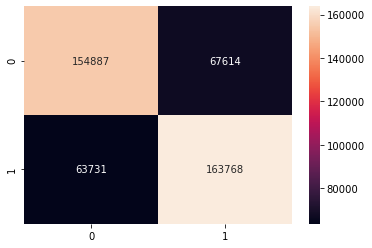

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [77]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.7081222222222222


In [100]:
from sklearn.model_selection import cross_val_score
kcv = cross_val_score(estimator=classifier_XG, 
                      X=X_train,
                      y=y_train,
                      cv=10
)
print('XGBoost Accuracy: %0.3f (+/- %0.3f)' % (kcv.mean(), kcv.std()*2))

[13:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## **4)Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 3,
                                    min_samples_split = 3,
                                    max_features = "auto",
                                    random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       min_samples_split=3, random_state=0)

In [106]:
y_pred = classifier_DT.predict(X_test)
classi = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.51      0.53    222501
           1       0.56      0.61      0.58    227499

    accuracy                           0.56    450000
   macro avg       0.56      0.56      0.56    450000
weighted avg       0.56      0.56      0.56    450000



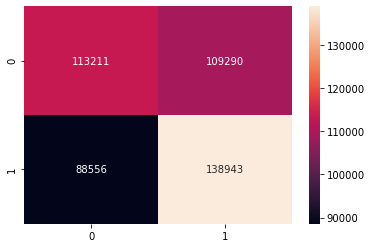

In [107]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [108]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.5603422222222222


In [114]:
from sklearn.model_selection import cross_val_score
kcv_DT = cross_val_score(estimator=classifier_DT, 
                      X=X_train,
                      y=y_train,
                      cv=10
)
print('Logistic Regression Accuracy: %0.3f (+/- %0.3f)' % (kcv_DT.mean(), kcv_DT.std()*2))

Logistic Regression Accuracy: 0.563 (+/- 0.008)


## **5)Naive Bayes** 

In [115]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB()

In [116]:
y_pred = classifier_NB.predict(X_test)
classi = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65    222501
           1       0.65      0.41      0.51    227499

    accuracy                           0.59    450000
   macro avg       0.61      0.59      0.58    450000
weighted avg       0.61      0.59      0.58    450000



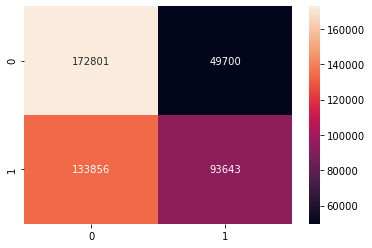

In [117]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [118]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.5920977777777777


In [121]:
from sklearn.model_selection import cross_val_score
kcv_NB = cross_val_score(estimator=classifier_NB, 
                      X=X_train,
                      y=y_train,
                      cv=10
)
print('Logistic Regression Accuracy: %0.3f (+/- %0.3f)' % (kcv_NB.mean(), kcv_NB.std()*2))

Logistic Regression Accuracy: 0.590 (+/- 0.011)


## **Hyperparametric Tuning** 

1) XGBoost using RandomizedSearch CV

## **1) XGBoost**

In [32]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [33]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
random_search=RandomizedSearchCV(estimator = classifier_XG,
                                 param_distributions=params,
                                 n_iter=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=3
                                )

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_params_

## **Final Predictions** 

In [126]:
final_test_dataset = data_test[['id', 'f1', 'f10', 'f11', 'f14', 'f15', 'f16', 'f17', 'f2', 'f20', 'f21', 'f22', 'f24', 'f25', 'f26', 'f27', 'f28', 'f3', 'f30', 'f31', 'f32', 'f33', 'f34', 'f36', 'f37', 'f4', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f5', 'f50', 'f51', 'f53', 'f54', 'f55', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f64', 'f66', 'f67', 'f70', 'f71', 'f76', 'f77', 'f8', 'f80', 'f81', 'f82', 'f83', 'f87', 'f89', 'f9', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98']]

KeyError: "['id'] not in index"

In [93]:
model_predict_LR = classifier_LR.predict(final_test_dataset)
model_predict_LR

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
final_submission = pd.DataFrame({'target': model_predict_LR})

In [95]:
final_submission.head()
final_submission.shape

(540000, 1)

In [108]:
#final_submission =final_submission .rename(index = {'id': 'id'}, inplace = False)

In [110]:
final_submission['id'] =final_submission.index 

In [131]:
final_submission.to_csv('TPS_Novem_2021',index=False)

In [117]:
final_submission.drop(columns='id', axis=1)

,target
0,1
1,1
2,1
3,0
4,1
...,...
539995,1
539996,1
539997,1
539998,1


In [129]:
final_submission['id'] = data_test['id'].astype(int)

In [130]:
final_submission.head()

,target,id
0,1,600000
1,1,600001
2,1,600002
3,0,600003
4,1,600004


In [ ]:
'